## What We Are Going To Do:
We are going to classify images of handwritten digits (MNIST dataset) using a fully-connected neural network.
After successful training, our model will be able to guess digits.

In [1]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model
from sklearn.preprocessing import normalize

Using TensorFlow backend.


## 1. Prepare Data:

The dataset is loaded in this section. 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('train data dim:', x_train.shape)
print(np.max(x_train))
print(np.min(x_train))

train data dim: (60000, 28, 28)
255
0


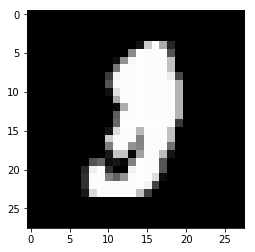

3


In [3]:
rand_num = np.random.randint(len(x_train))

plt.imshow(x_train[rand_num],cmap='gray')
plt.show()
print(y_train[rand_num])

**Our Network accept 1D data. So we flatten our 2D image.**

In [4]:
temp = len(x_train[0])*len(x_train[0][0])
x_train = np.reshape(x_train,(len(x_train), temp))
x_test = np.reshape(x_test,(len(x_test), temp))

**Normalize data by rescaling them to (0,1)**

In [5]:
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_train)

**Convert label arrays to 1-hot representation**

In [6]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## 2. Define Model
**Add the following layers to the network:**
* Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
* Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
* Outout Layer: Fully Connected + Softmax Activition (e.g 10 Neurons) calasses:[0,1,2,3,4,5,6,7,8,9]

In [7]:
model = Sequential()
# Hidden Layer1:
model.add(Dense(512, activation='relu',kernel_initializer = RandomNormal(0,0.01), input_shape=(temp,)))
# Hidden Layer2:
model.add(Dense(512, activation='relu',kernel_initializer = RandomNormal(0,0.01)))
# Output Layer1:
model.add(Dense(10, activation='softmax',kernel_initializer = RandomNormal(0,0.01)))

**Determine loss function, optimizer and metrics for the model**

In [8]:
#the optimizer and its learning rate
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

**Print the review of the model**

In [9]:
model.summary()
# Here we saved the raw model without any training. we will use it later.
model.save('raw_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## 3. Train And Evaluate Model. 
**Train model on training data**

In [10]:
history = model.fit(x_train, y_train, batch_size=32,epochs=3,verbose=1,validation_data=(x_test, y_test),validation_split=0.2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 44s 727us/step - loss: 2.0144 - acc: 0.3624 - val_loss: 4.0203 - val_acc: 0.7374
Epoch 2/3
60000/60000 [==============================] - 43s 717us/step - loss: 0.5878 - acc: 0.8289 - val_loss: 2.0092 - val_acc: 0.8729
Epoch 3/3
60000/60000 [==============================] - 37s 613us/step - loss: 0.3910 - acc: 0.8879 - val_loss: 1.6633 - val_acc: 0.8941


**Evaluate model on test data**

In [11]:
loss = model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)
print(loss)

10000/10000 [==============================] - 1s 126us/step
[1.6633325996143278, 0.8941]


**Save model**

In Keras, you can save the model to a HDF5 file(.h5) and reload it later simply by model.save(filepath) and keras.models.load_model(filepath), respectively.

The saved model contains:
* the architecture of the model, allowing to re-create the model
* the weights of the model
* the training configuration (loss, optimizer)
* the state of the optimizer, allowing to resume training exactly where you left off.


In [12]:
model.save('mlp.h5')
# Delete model to make sure you reload it correctly:
del model

**Load model and Predict label for a random image in train set. Verify predicted label by ploting the image.**

In [13]:
model = load_model('mlp.h5') 

In [14]:
a = np.random.randint(len(x_test))
print(model.predict(x_test)[a])
print(y_test[a])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


**Continue training + Callbacks**

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 30s 634us/step - loss: 0.3405 - acc: 0.9022 - val_loss: 0.2992 - val_acc: 0.9133
Epoch 2/100
48000/48000 [==============================] - 32s 657us/step - loss: 0.3059 - acc: 0.9133 - val_loss: 0.2694 - val_acc: 0.9241
Epoch 3/100
48000/48000 [==============================] - 31s 644us/step - loss: 0.2747 - acc: 0.9226 - val_loss: 0.2436 - val_acc: 0.9317
Epoch 4/100
48000/48000 [==============================] - 28s 577us/step - loss: 0.2460 - acc: 0.9300 - val_loss: 0.2257 - val_acc: 0.9354
Epoch 5/100
48000/48000 [==============================] - 33s 697us/step - loss: 0.2214 - acc: 0.9376 - val_loss: 0.2042 - val_acc: 0.9418
Epoch 6/100
48000/48000 [==============================] - 37s 778us/step - loss: 0.2004 - acc: 0.9428 - val_loss: 0.1889 - val_acc: 0.9458
Epoch 7/100
48000/48000 [==============================] - 41s 857us/step - loss: 0.1826 - acc: 0.9475 - val_l

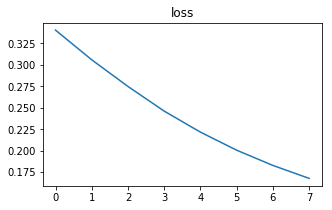

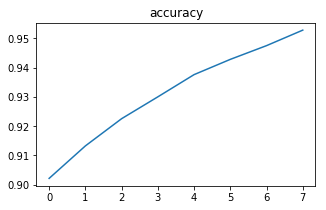

In [15]:
# We will use two callbacks here: EarlyStopping, CSVLogger (you may add other callbacks to this list)
callback = [keras.callbacks.EarlyStopping(monitor='val_acc', verbose=1, min_delta=0.01, patience = 2, mode = 'max'),
            keras.callbacks.CSVLogger('log.csv'),keras.callbacks.BaseLogger(stateful_metrics=None)]
history = model.fit(x_train, y_train,batch_size = 32,epochs = 100,verbose = 1,validation_split = 0.2,callbacks = callback)

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');

In [16]:
model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

10000/10000 [==============================] - 2s 187us/step


[0.8500307354156975, 0.9468]

## 4. Extras
**Initialization is important!**

this time use mean=0 and std=1 for initialization.

In [17]:
model2 = Sequential()
model2.add(Dense(448, activation='selu',kernel_initializer = RandomNormal(0,1), input_shape=(784,)))
model2.add(Dense(448, activation='selu',kernel_initializer = RandomNormal(0,1)))
model2.add(Dense(10, activation='softmax',kernel_initializer = RandomNormal(0,1)))
model2.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
model2.summary()
model2.save('raw_model2.h5')
history = model2.fit(x_train, y_train, batch_size=64,epochs=5,verbose=1,validation_data=(x_test, y_test),validation_split=0.25)
loss = model2.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)
print(loss)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 448)               351680    
_________________________________________________________________
dense_5 (Dense)              (None, 448)               201152    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                4490      
Total params: 557,322
Trainable params: 557,322
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 41s 686us/step - loss: 12.0418 - acc: 0.2526 - val_loss: 10.7524 - val_acc: 0.3329
Epoch 2/5
60000/60000 [==============================] - 39s 645us/step - loss: 10.8164 - acc: 0.3288 - val_loss: 10.6605 - val_acc: 0.3386
Epoch 3/5
60000/60000 [==============================] - 39s 646us/ste

**When I changed std(normal range (0.01,0.05)) to 1 and relu to 'selu' and  optimizer to 'Nadam' and decrease neurons count, as you see, accuracy went down and loss increased in the bad way while it increased computationaly beacuase of selu.**

## Overfitting/Underfitting
**Load the 'raw_model.h5' and this time use 1 percent of training data for training, and all test data for validation.**

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 39s 723us/step - loss: 2.1224 - acc: 0.3366 - val_loss: 1.2120 - val_acc: 0.6850
Epoch 2/100
54000/54000 [==============================] - 41s 753us/step - loss: 0.6855 - acc: 0.7990 - val_loss: 0.4027 - val_acc: 0.8877
Epoch 3/100
54000/54000 [==============================] - 58s 1ms/step - loss: 0.4214 - acc: 0.8789 - val_loss: 0.3156 - val_acc: 0.9087
Epoch 4/100
54000/54000 [==============================] - 41s 760us/step - loss: 0.3546 - acc: 0.8972 - val_loss: 0.2753 - val_acc: 0.9237
Epoch 5/100
54000/54000 [==============================] - 39s 727us/step - loss: 0.3130 - acc: 0.9100 - val_loss: 0.2421 - val_acc: 0.9325
Epoch 6/100
54000/54000 [==============================] - 38s 696us/step - loss: 0.2776 - acc: 0.9207 - val_loss: 0.2167 - val_acc: 0.9417
Epoch 7/100
54000/54000 [==============================] - 41s 754us/step - loss: 0.2462 - acc: 0.9304 - val_loss

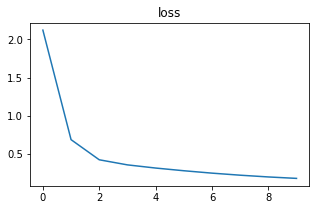

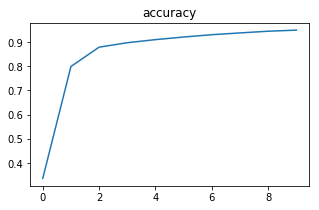

In [19]:
del model
model = load_model('raw_model.h5') 
callback = [keras.callbacks.EarlyStopping(monitor='val_acc', verbose=1, min_delta=0.01, patience = 2, mode = 'max')]
history = model.fit(x_train, y_train,batch_size = 32,epochs = 100,verbose = 1,validation_split = 0.1,callbacks = callback)

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['acc'])
plt.title('accuracy');

In [20]:
model.evaluate(x=x_test, y=y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

10000/10000 [==============================] - 2s 157us/step


[0.8754431659538721, 0.9448]

**Result:** When i test trained network on 0.1 of validation data it seems acc is the same rather